# Binomi, Poisson, Gauss random numbers

Generating and plotting random numbers drawn from the binomial, Poisson and Gaussian distribution.

You can either run this in binder
https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=BinomiPoissonGauss.ipynb , 

or - much, much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/). 

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...)

Alternatively, you can download the entire github repository. Open a terminal window. Go to the directory where you want a copy of this github repository to live on your computer. Then execute the command:

git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

(alternatively, go to https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath and find the green "Code" button and take it from there)

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.

First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Before we start, let's initialise the random number generator. Change the seed to get different outcomes for (peudo)random numbers used in this sheet.

In [2]:
np.random.seed(650)

Let's generate random numbers according to each of these distributions. It's not really necessary to wrap these fully functional numpy functions into my own functions, but I'll do it anyway, in the hope it will add clarity

In [3]:
def binomial(NumTries, p_success, howoften=1):
    return np.random.binomial(NumTries, p_success, howoften)

def Poisson(mean, howoften=1):
    return np.random.poisson(mean, howoften)

def Gauss(mean, sigma, howoften=1):
    return np.random.normal(mean, sigma, howoften)

print(binomial(10, 0.5), Poisson(5), Gauss(5, sqrt(5)))

[7] [6] [4.06763569]


Let's fill histograms with them:

In [4]:
def MakeAndPlotBinomi(NumTries, p_success, sampleSize):
    binomiArray  = binomial(NumTries, p_success, sampleSize)
    mean = NumTries*p_success
    sigma=sqrt(NumTries*p_success*(1.0-p_success))
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = int(r[1]-r[0])//10+1
    if NumTries < 1000:
        nbins=NumTries + 1
        r=(0, nbins)

    hb=plt.hist(binomiArray,  nbins, range=r, linewidth=2, histtype='step', color='r')
    plt.show()
    print(sampleSize, "random numbers according to Binomial",
          "\nfor N=", NumTries, "p=", p_success)


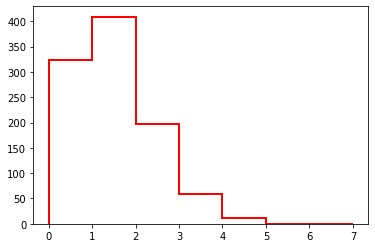

1000 random numbers according to Binomial 
for N= 6 p= 0.16666666666666666


In [5]:
MakeAndPlotBinomi(6, 1/6, 1000)

In [6]:
def MakeAndPlotPoisson(mean, sampleSize):
    PoissonArray = Poisson (mean, sampleSize)
    sigma=sqrt(mean)
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = int(r[1]-r[0])//10+1
    if mean < 50:
        nbins = int(mean + 4*sigma)+1
        r=(0, nbins)

    hp=plt.hist(PoissonArray, nbins, range=r, linewidth=2, histtype='step', color='b')
    plt.show()
    print(sampleSize, "random numbers according to Poisson (blue)",
          "\nfor lambda =", mean)


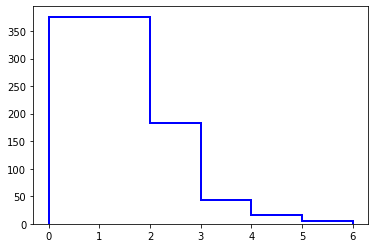

1000 random numbers according to Poisson (blue) 
for lambda = 1


In [7]:
MakeAndPlotPoisson(1, 1000)

In [8]:
def MakeAndPlotGauss(mean, sigma, sampleSize):
    GaussArray   = Gauss(mean, sigma, sampleSize)
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = sampleSize//50
    if nbins < 5: nbins=5
    if nbins > 100: nbins=100

    hg=plt.hist(GaussArray,   nbins, range=r, linewidth=2, histtype='step', color='g')
    plt.show()
    print(sampleSize, "random numbers according to Gaussian",
          "\nfor mu =", mean, ",sigma=", sigma)
    

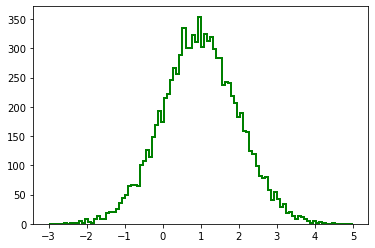

10000 random numbers according to Gaussian 
for mu = 1 ,sigma= 1


In [9]:
MakeAndPlotGauss(1, 1, 10000)

Now plot them all on top of each other.

In [10]:
def MakeAndPlotAll_GaussWithBinomialSigma(NumTries, p_success, sampleSize):
    binomiArray  = binomial(NumTries, p_success, sampleSize)
    mean = NumTries*p_success
    PoissonArray = Poisson (mean, sampleSize)
    sigma=sqrt(NumTries*p_success*(1.0-p_success))   # this is where I give the Gaussian the binomial sigma
    GaussArray   = Gauss(mean, sigma, sampleSize)
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = int(r[1]-r[0])//10+1
    if NumTries < 1000:
        nbins=NumTries + 1
        r=(0, nbins)

    hb=plt.hist(binomiArray,  nbins, range=r, linewidth=2, histtype='step', color='r')
    hp=plt.hist(PoissonArray, nbins, range=r, linewidth=2, histtype='step', color='b')
    hg=plt.hist(GaussArray,   nbins, range=r, linewidth=2, histtype='step', color='g')
    plt.show()
    print(sampleSize, "random numbers according to Binomial (red), Poisson (blue) and Gaussian (green)"
          , "\nfor N=", NumTries, "p=", p_success
          , ",lambda=mu=N*p=", NumTries*p_success
          , ",sigma=sqrt(N*p*(1-p))=", sigma)

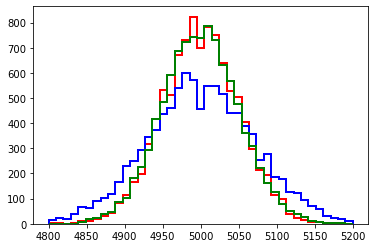

10000 random numbers according to Binomial (red), Poisson (blue) and Gaussian (green) 
for N= 10000 p= 0.5 ,lambda=mu=N*p= 5000.0 ,sigma=sqrt(N*p*(1-p))= 50.0


In [11]:
MakeAndPlotAll_GaussWithBinomialSigma(10000, 0.5, 10000)

Try for which values of N and p the approximations are good or not so good. Note that, the code above, the width of the Gaussian is set to match that of the Binomial. If you want to know how well a Gaussian approximates a Poisson, you'll need to change this (or pick a value of p where it doesn't matter).

In [12]:
def MakeAndPlotAll_GaussWithPoissonSigma(NumTries, p_success, sampleSize):
    binomiArray  = binomial(NumTries, p_success, sampleSize)
    mean = NumTries*p_success
    PoissonArray = Poisson (mean, sampleSize)
    sigma=sqrt(mean)                               # this is where I give the Gaussian the Poisson sigma
    GaussArray   = Gauss(mean, sigma, sampleSize)
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = int(r[1]-r[0])//10+1
    if NumTries < 1000:
        nbins=NumTries + 1
        r=(0, nbins)

    hb=plt.hist(binomiArray,  nbins, range=r, linewidth=2, histtype='step', color='r')
    hp=plt.hist(PoissonArray, nbins, range=r, linewidth=2, histtype='step', color='b')
    hg=plt.hist(GaussArray,   nbins, range=r, linewidth=2, histtype='step', color='g')
    plt.show()
    print(sampleSize, "random numbers according to Binomial (red), Poisson (blue) and Gaussian (green)",
          "\nfor N=", NumTries, "p=", p_success
          , ",lambda=mu=N*p=", NumTries*p_success
          , ",sigma=sqrt(mean)", sigma)

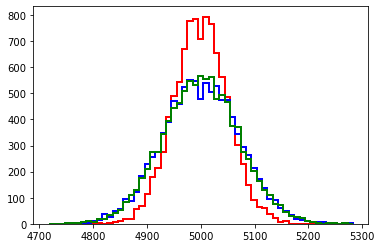

10000 random numbers according to Binomial (red), Poisson (blue) and Gaussian (green) 
for N= 10000 p= 0.5 ,lambda=mu=N*p= 5000.0 ,sigma=sqrt(mean) 70.71067811865476


In [13]:
MakeAndPlotAll_GaussWithPoissonSigma(10000, 0.5, 10000)